In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
import warnings
from bs4 import BeautifulSoup
from io import StringIO
import httpx

def standardize_pitch_types(df):
    return df.replace({
        "TaggedPitchType": {
            "Fastball": "Four-Seam",
            "FourSeamFastBall": "Four-Seam",
            "TwoSeamFastBall": "Two-Seam",
            "Sinker": "Sinker",
            "ChangeUp": "ChangeUp",
            "Slider": "Slider",
            "Curveball": "Curveball",
            "Cutter": "Cutter",
            "Splitter": "Splitter",
            "Sweeper": "Slider"
        }
    })

file_path = r"C:\Users\brend\OneDrive - Stonehill College\All Cape League Trackman.xlsx"
df = pd.read_excel(file_path)
df = standardize_pitch_types(df)

df = df[df["TaggedPitchType"] != "Other"]
df = df[df["TaggedPitchType"] != "Undefined"]

In [73]:
player_name = input("Enter player name: ")

Enter player name:  Gray, Michael


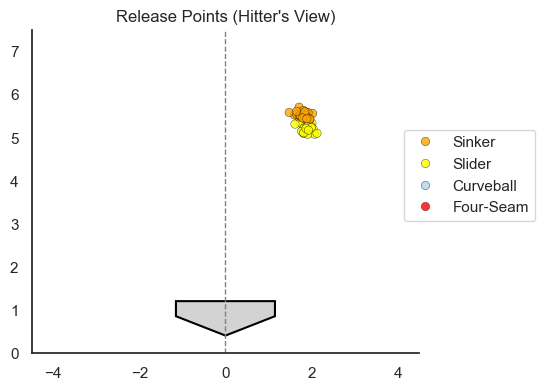

In [75]:
fixed_pitch_colors = {
    "Four-Seam": "#FF0000",
    "Fastball": "#FF0000",
    "Two-Seam": "#FF6666",
    "Sinker": "#FFA500",
    "ChangeUp": "#00CC66",
    "Slider": "#FFFF00",
    "Curveball": "#ADD8E6",
    "Cutter": "#8B0000",
    "Splitter": "#008080"
}

player_df = df[
    (df["Pitcher"].str.strip() == player_name.strip()) & 
    df["RelHeight"].notna() & 
    df["RelSide"].notna() & 
    df["TaggedPitchType"].notna()
].copy()

player_df = standardize_pitch_types(player_df)

if not player_df["PitcherThrows"].isna().all():
    if player_df["PitcherThrows"].iloc[0] == "L":
        player_df["RelSide"] *= -1

player_df["RelSide"] *= -1

if player_df.empty:
    print(f"No data found for player: {player_name}")

else:
    unique_pitches = player_df["TaggedPitchType"].unique()
    color_map = {pitch: fixed_pitch_colors.get(pitch, "black") for pitch in unique_pitches}

    plt.figure(figsize=(5, 7))
    sns.set(style="white")

    sns.scatterplot(
        data=player_df,
        x="RelSide",
        y="RelHeight",
        hue="TaggedPitchType",
        palette=color_map,
        edgecolor="black",
        linewidth=0.3,
        alpha=0.8
    )

    plt.axvline(0, linestyle="--", color="gray", linewidth=1)
    plt.xlabel("")
    plt.ylabel("")
    plt.xlim(-4.5, 4.5)
    plt.ylim(0, 7.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Release Points (Hitter's View)")
    plt.legend(
        title="",
        loc="center left",
        bbox_to_anchor=(.96, 0.55),
        borderaxespad=0.
    )
    sns.despine()
    
    plate_y = 1.2
    half_width = 1.15
    inner_y_offset = 0.35
    point_depth = 0.8

    plate = Polygon(
        [
            [-half_width, plate_y],
            [ half_width, plate_y],
            [ half_width, plate_y - inner_y_offset],
            [0.00, plate_y - point_depth],
            [-half_width, plate_y - inner_y_offset]  
        ],
        closed=True,
        facecolor='lightgray',
        edgecolor='black',
        linewidth=1.5,
        zorder=1
    )
    plt.gca().add_patch(plate)

    plt.show()

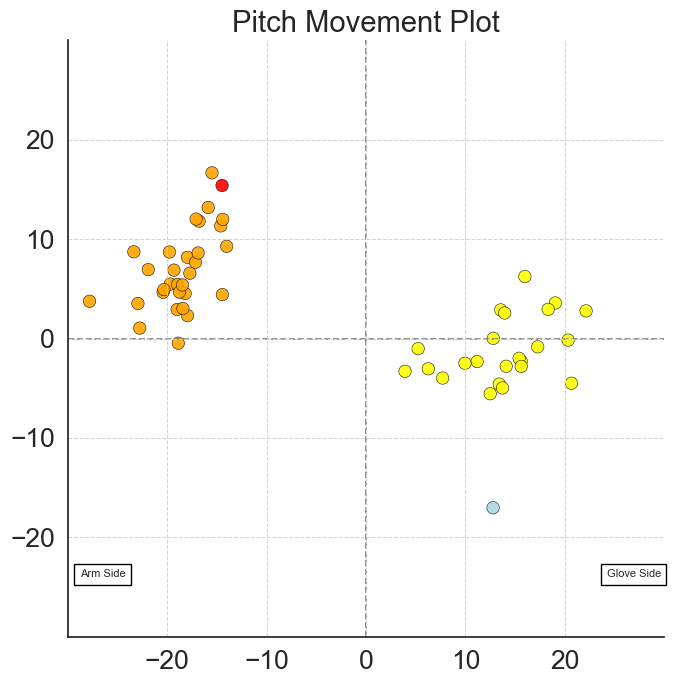

In [77]:
player_df = df[
    (df["Pitcher"].str.strip() == player_name.strip()) &
    df["TaggedPitchType"].notna() &
    df["BatterSide"].isin(["Right", "Left"])
].copy()

player_df = standardize_pitch_types(player_df)

plt.figure(figsize=(7, 7))
sns.set(style="white")

sns.scatterplot(
    data=player_df,
    x="HorzBreak",
    y="InducedVertBreak",
    hue="TaggedPitchType",
    palette=color_map,
    edgecolor="black",
    linewidth=0.4,
    alpha=0.9,
    s=80,
    legend=False
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1.2)
plt.axvline(0, color='gray', linestyle='--', linewidth=1.2)

for tick in range(-20, 21, 10):
    plt.axhline(tick, color='#D3D3D3', linestyle='--', linewidth=0.75)
    plt.axvline(tick, color='#D3D3D3', linestyle='--', linewidth=0.75)

plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.xticks(range(-20, 21, 10), fontsize=19)
plt.yticks(range(-20, 21, 10), fontsize=19)
plt.xlabel("", fontsize=15)
plt.ylabel("", fontsize=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"Pitch Movement Plot", fontsize=21)

if not player_df["PitcherThrows"].dropna().empty:
    PitcherThrows = player_df["PitcherThrows"].dropna().iloc[0]

if PitcherThrows == "Right":
    plt.text(-24.2, -24.2, '', fontstyle='italic', ha='left', va='bottom',
             bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)
    plt.text(24.2, -24.2, '', fontstyle='italic', ha='right', va='bottom',
             bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)
elif PitcherThrows == "Left":
    plt.text(24.2, -24.2, 'Glove Side', ha='left', va='bottom',
             bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)
    plt.text(-24.2, -24.2, 'Arm Side', ha='right', va='bottom',
             bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

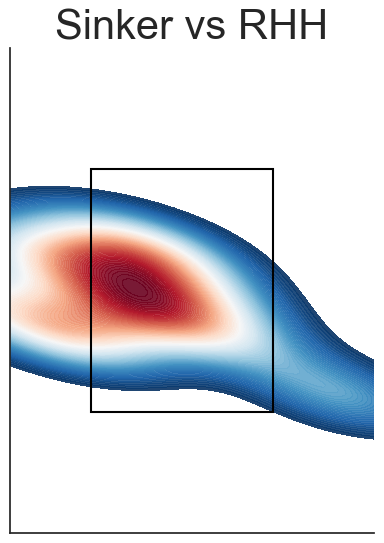

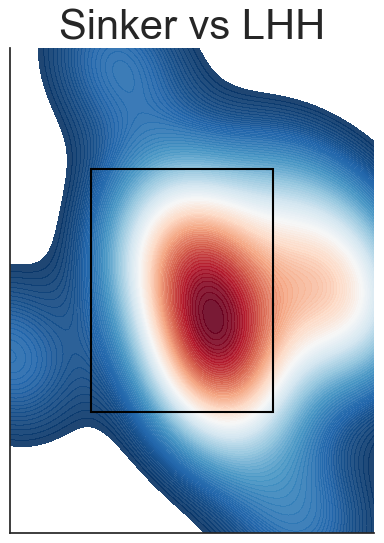

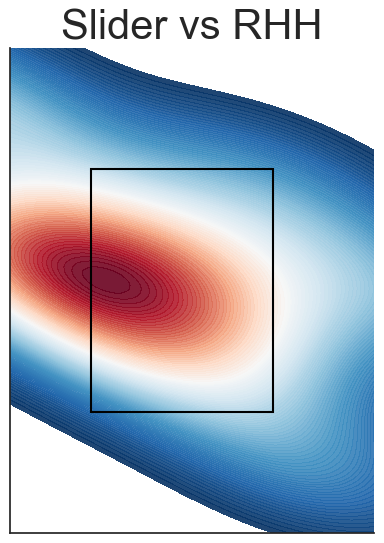

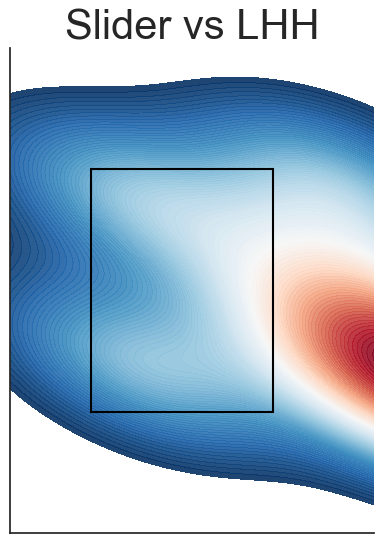

In [78]:
player_df = df[
    (df["Pitcher"].str.strip() == player_name.strip()) & 
    df["PlateLocSide"].notna() & 
    df["PlateLocHeight"].notna() & 
    df["TaggedPitchType"].notna() &
    df["BatterSide"].isin(["Right", "Left"])
].copy()

player_df = standardize_pitch_types(player_df)

if not player_df["PitcherThrows"].isna().all():
    if player_df["PitcherThrows"].iloc[0] == "Left":
        player_df["PlateLocSide"] *= -1

player_df["PlateLocSide"] *= -1

pitch_types = player_df["TaggedPitchType"].unique()
batter_sides = ["Right", "Left"]

for pitch in pitch_types:
    for side in batter_sides:
        subset = player_df[
            (player_df["TaggedPitchType"] == pitch) & 
            (player_df["BatterSide"] == side)
        ]

        if len(subset) < 5:
            continue

        plt.figure(figsize=(4, 6))
        sns.set(style="white")

        sns.kdeplot(
            data=subset,
            x="PlateLocSide",
            y="PlateLocHeight",
            fill=True,
            thresh=0.05,
            cmap="RdBu_r",
            levels=100,
            alpha=0.9
        )

        strike_zone = Rectangle(
            (-0.83, 1.5), 1.5, 2,
            linewidth=1.5, edgecolor='black', facecolor='none'
        )
        plt.gca().add_patch(strike_zone)

        plt.xlim(-1.5, 1.5)
        plt.ylim(0.5, 4.5)
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks([])
        plt.yticks([])
        plt.title(f"{pitch} vs {'RHH' if side == 'Right' else 'LHH'}", fontsize=30)
        plt.gca().set_aspect('equal', adjustable='box')
        sns.despine()
        plt.tight_layout()
        plt.show()

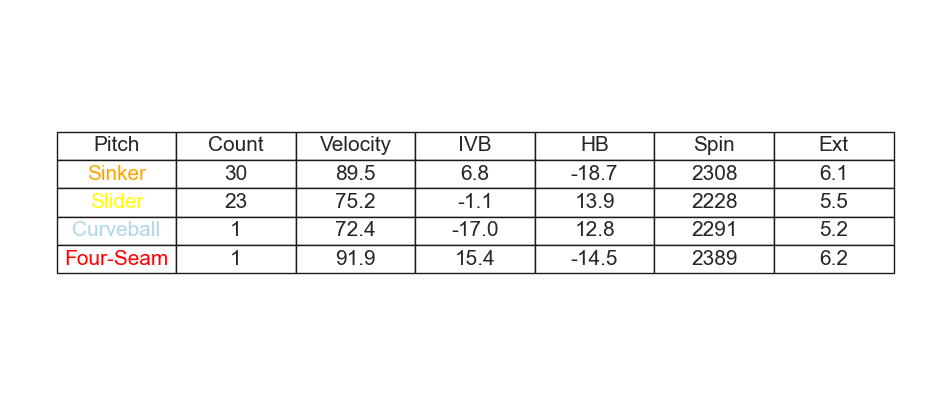

In [80]:
def create_statcast_table(df: pd.DataFrame, player_name: str) -> pd.DataFrame:
    player_df = df[df["Pitcher"].str.strip() == player_name.strip()].copy()
    player_df = player_df[player_df["TaggedPitchType"].notna()]

    player_df = standardize_pitch_types(player_df)
    
    summary = player_df.groupby("TaggedPitchType").agg(
        Count=("TaggedPitchType", "size"),
        Velocity=("RelSpeed", "mean"),
        IVB=("InducedVertBreak", "mean"),
        HB=("HorzBreak", "mean"),
        Spin=("SpinRate", "mean"),
        Ext=("Extension", "mean"),
    ).reset_index()

    total_pitches = summary["Count"].sum()
    summary["Usage"] = 100 * summary["Count"] / total_pitches
    summary = summary.rename(columns={"TaggedPitchType": "Pitch"})

    return summary[[
        "Pitch", "Count", "Velocity", "IVB", "HB",
        "Spin", "Ext"
    ]]

def generate_pitch_color_map(pitch_types):
    return {pitch: fixed_pitch_colors.get(pitch, "black") for pitch in pitch_types}

def statcast_table(ax: plt.Axes, df: pd.DataFrame, player_name: str, pitch_colors: dict):
    table_df = create_statcast_table(df, player_name)

    table_df = table_df.sort_values(by="Count", ascending=False).reset_index(drop=True)
    for col in ["Velocity", "IVB", "HB", "Ext"]:
        table_df[col] = table_df[col].map("{:.1f}".format)
    table_df["Spin"] = table_df["Spin"].map("{:.0f}".format)

    table = ax.table(
        cellText=table_df.values,
        colLabels=table_df.columns,
        loc='center',
        cellLoc='center',
        colLoc='center'
    )

    for i, pitch in enumerate(table_df['Pitch']):
        color = pitch_colors.get(pitch, 'black')
        table[(i + 1, 0)].set_text_props(color=color)

    table.auto_set_font_size(False)
    table.set_fontsize(15)
    table.scale(.9, 1.7)
    ax.axis('off')

player_pitches = df[
    (df["Pitcher"].str.strip() == player_name.strip()) &
    df["TaggedPitchType"].notna()
]["TaggedPitchType"].unique()

pitch_color_map = generate_pitch_color_map(player_pitches)

fig, ax = plt.subplots(figsize=(12, 5))
statcast_table(ax, df, player_name, pitch_color_map)
plt.show()

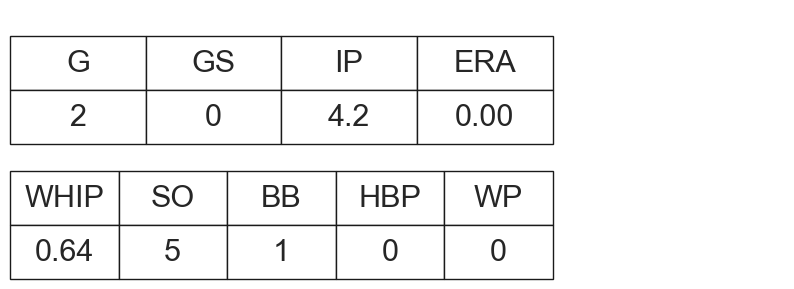

In [83]:
def basic_stats_table(ax: plt.Axes):
    warnings.filterwarnings("ignore", category=FutureWarning)

    # CHANGE URL
    url = "https://www.baseball-reference.com/register/player.fcgi?id=gray--007mic"
    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
    }

    response = httpx.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', id='standard_pitching')
    df = pd.read_html(StringIO(str(table)))[0]

    df.columns = df.columns.str.strip()
    df['Tm'] = df['Tm'].str.strip()
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df = df.dropna(subset=['Year'])
    df["Tm"] = df["Tm"].str.replace("\u00A0", " ").str.strip()

    filtered_df = df[
        (df["Year"].isin([2025])) & (df["Tm"].isin(["Cotuit"]))
    ].copy()

    filtered_df["BF"] = pd.to_numeric(filtered_df["BF"], errors='coerce')

    final_df = filtered_df[["Year", "Tm", "G", "GS", "IP", "ERA", "WHIP", "SO", "BB", "HBP", "WP"]].copy()

    final_df["Year"] = final_df["Year"].astype(int)
    int_cols = ["SO", "BB", "HBP", "WP"]
    for col in int_cols:
        final_df[col] = final_df[col].astype(int)

    final_df["ERA"] = final_df["ERA"].astype(float).map("{:.2f}".format)
    final_df["WHIP"] = final_df["WHIP"].astype(float).map("{:.2f}".format)

    display_df = final_df.drop(columns=["Year", "Tm"])

    mid = len(display_df.columns) // 2
    df1 = display_df.iloc[:, :mid]
    df2 = display_df.iloc[:, mid:]

    for i, table_df in enumerate([df1, df2]):
        table = ax.table(
            cellText=table_df.values,
            colLabels=table_df.columns,
            loc="center",
            cellLoc="center",
            colLoc="center",
            bbox=[0, 0.5 * (1 - i), .7, 0.4]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(22)
        table.scale(1.8, 2)

    ax.axis("off")

fig, ax = plt.subplots(figsize=(10, 3.5))
basic_stats_table(ax=ax)
plt.show()

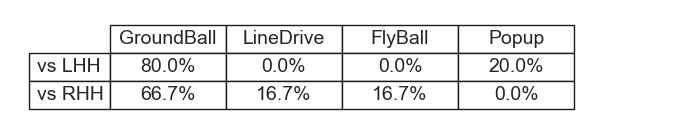

In [84]:
player_df = df[
    (df["Pitcher"].str.strip() == player_name.strip()) &
    df["BatterSide"].isin(["Right", "Left"]) &
    df["AutoHitType"].notna()
].copy()

player_df = standardize_pitch_types(player_df)

if player_df.empty:
    print(f"No batted ball data found for {player_name}.")
else:
    player_df["AutoHitType"] = player_df["AutoHitType"].str.strip()

    ball_counts = (
        player_df.groupby(["BatterSide", "AutoHitType"])
        .size()
        .unstack(fill_value=0)
    )

    ball_percents = ball_counts.div(ball_counts.sum(axis=1), axis=0) * 100
    ball_percents = ball_percents.rename(index={"Right": "vs RHH", "Left": "vs LHH"})
    ball_percents = ball_percents.round(1)

    desired_order = ["GroundBall", "LineDrive", "FlyBall", "Popup"]
    ball_percents = ball_percents[[col for col in desired_order if col in ball_percents.columns]]

    ball_percents = ball_percents.astype(str) + '%'

    fig, ax = plt.subplots(figsize=(7, 1.5))
    ax.axis('off')

    table = ax.table(
        cellText=ball_percents.values,
        rowLabels=ball_percents.index,
        colLabels=ball_percents.columns,
        cellLoc='center',
        colLoc='center',
        loc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(.7, 1.7)

    plt.tight_layout()
    plt.show()

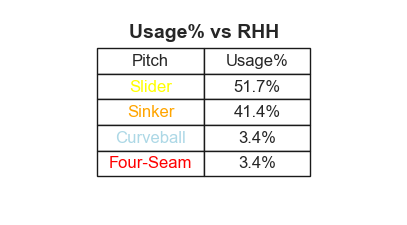

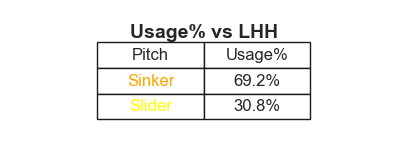

In [85]:
def calculate_usage(df, batter_side):
    df = df.copy()
    df["TaggedPitchType"] = df["TaggedPitchType"].replace({
        "Fastball": "Four-Seam",
        "FourSeamFastBall": "Four-Seam",
        "TwoSeamFastBall": "Two-Seam"
    })
    
    df_side = df[df["BatterSide"] == batter_side]
    pitch_counts = df_side["TaggedPitchType"].value_counts()
    total = pitch_counts.sum()
    usage_df = (pitch_counts / total * 100).reset_index()
    usage_df.columns = ["Pitch", "Usage%"]
    usage_df["BatterSide"] = batter_side
    return usage_df

df_pitcher = df[
    (df["Pitcher"].str.strip() == player_name.strip()) &
    df["BatterSide"].isin(["Right", "Left"]) &
    df["TaggedPitchType"].notna()
].copy()

usage_rhh = calculate_usage(df_pitcher, "Right")
usage_lhh = calculate_usage(df_pitcher, "Left")

def plot_usage_table(usage_df, title, pitch_colors):
    df_sorted = usage_df.sort_values("Usage%", ascending=False).reset_index(drop=True)
    fig, ax = plt.subplots(figsize=(5, len(df_sorted)*0.4 + 1))
    ax.axis('off')
    ax.axis('tight')

    df_sorted["Usage%"] = df_sorted["Usage%"].apply(lambda x: f"{x:.1f}%")

    table = ax.table(
        cellText=df_sorted[["Pitch", "Usage%"]].values,
        colLabels=["Pitch", "Usage%"],
        cellLoc="center",
        loc="center"
    )

    for i, pitch in enumerate(df_sorted["Pitch"]):
        color = pitch_colors.get(pitch, "black")
        table[(i + 1, 0)].set_text_props(color=color)

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(.55, 1.5)
    plt.title(title, fontsize=14, weight='bold', pad=-20)
    plt.subplots_adjust(top=0.9)
    plt.show()

plot_usage_table(usage_rhh, "Usage% vs RHH", color_map)
plot_usage_table(usage_lhh, "Usage% vs LHH", color_map)

C:\Users\brend\AppData\Local\Temp\ipykernel_14008\3290799325.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df_pitcher.groupby(["TaggedPitchType", "BatterSide"]).apply(calculate_stats).reset_index()


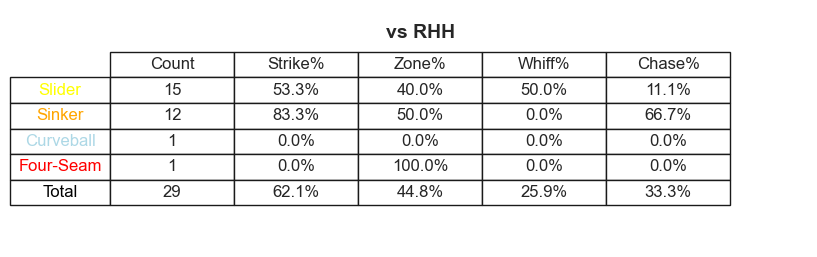

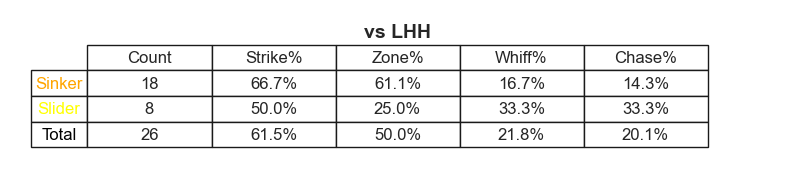

In [86]:
df["TaggedPitchType"] = df["TaggedPitchType"].replace({
    "Fastball": "Four-Seam",
    "FourSeamFastBall": "Four-Seam"
})

df_pitcher["BatterSide"] = df_pitcher["BatterSide"].str.capitalize()

def in_strike_zone(row):
    return (-0.76 <= row["PlateLocSide"] <= 0.76) and (1.49 <= row["PlateLocHeight"] <= 3.51)

df_pitcher["InZone"] = df_pitcher.apply(in_strike_zone, axis=1)

swing_calls = ["StrikeSwinging", "FoulBallNotFieldable", "InPlay", "FoulBallFieldable"]
whiff_calls = ["StrikeSwinging"]
strike_calls = ["StrikeCalled", "StrikeSwinging", "FoulBallNotFieldable", "FoulBallFieldable", "InPlay"]

unique_pitches = df_pitcher["TaggedPitchType"].dropna().unique()
color_map = {pitch: fixed_pitch_colors.get(pitch, "black") for pitch in unique_pitches}

def calculate_stats(group):
    total_pitches = len(group)
    if total_pitches == 0:
        return pd.Series({
            "Count": 0,
            "Strike%": 0,
            "Zone%": 0,
            "Whiff%": 0,
            "Chase%": 0
        })

    strikes = group["PitchCall"].isin(strike_calls).sum()
    strike_pct = strikes / total_pitches

    zone_pct = group["InZone"].sum() / total_pitches

    swings = group["PitchCall"].isin(swing_calls).sum()
    whiffs = group["PitchCall"].isin(whiff_calls).sum()
    whiff_pct = whiffs / swings if swings > 0 else 0

    outside_zone = group[~group["InZone"]]
    swings_outside = outside_zone["PitchCall"].isin(swing_calls).sum()
    chase_pct = swings_outside / len(outside_zone) if len(outside_zone) > 0 else 0

    return pd.Series({
        "Count": total_pitches,
        "Strike%": strike_pct,
        "Zone%": zone_pct,
        "Whiff%": whiff_pct,
        "Chase%": chase_pct
    })

stats = df_pitcher.groupby(["TaggedPitchType", "BatterSide"]).apply(calculate_stats).reset_index()

def add_total_row(df_subset):
    total_count = df_subset["Count"].sum()
    weighted = lambda col: (df_subset[col] * df_subset["Count"]).sum()

    return pd.concat([
        df_subset,
        pd.DataFrame({
            "Count": [total_count],
            "Strike%": [weighted("Strike%") / total_count if total_count > 0 else 0],
            "Zone%": [weighted("Zone%") / total_count if total_count > 0 else 0],
            "Whiff%": [weighted("Whiff%") / total_count if total_count > 0 else 0],
            "Chase%": [weighted("Chase%") / total_count if total_count > 0 else 0]
        }, index=["Total"])
    ])

columns = ["Count", "Strike%", "Zone%", "Whiff%", "Chase%"]

stats_rhh = stats[stats["BatterSide"] == "Right"].set_index("TaggedPitchType")
stats_rhh = stats_rhh.sort_values("Count", ascending=False)
stats_rhh = add_total_row(stats_rhh)

stats_lhh = stats[stats["BatterSide"] == "Left"].set_index("TaggedPitchType")
stats_lhh = stats_lhh.sort_values("Count", ascending=False)
stats_lhh = add_total_row(stats_lhh)

def plot_stats_table(df, title, pitch_colors):
    fig, ax = plt.subplots(figsize=(10, len(df)*0.4 + 1))
    ax.axis('off')
    ax.axis('tight')

    def format_cell(x, col):
        if col == "Count":
            return f"{int(x)}"
        else:
            return f"{x*100:.1f}%" if pd.notnull(x) else "N/A"

    table_data = df[columns].copy()
    for col in columns:
        table_data[col] = table_data[col].apply(lambda x: format_cell(x, col))

    table = ax.table(
        cellText=table_data.values,
        rowLabels=table_data.index,
        colLabels=columns,
        cellLoc="center",
        rowLoc="center",
        loc="center"
    )

    for i, label in enumerate(df.index):
        color = pitch_colors.get(label, 'black')
        table[(i + 1, -1)].set_text_props(color=color)

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(.8, 1.5)
    plt.title(title, fontsize=14, weight='bold', pad=-20)
    plt.subplots_adjust(top=0.9)
    plt.show()

plot_stats_table(stats_rhh, "vs RHH", color_map)
plot_stats_table(stats_lhh, "vs LHH", color_map)

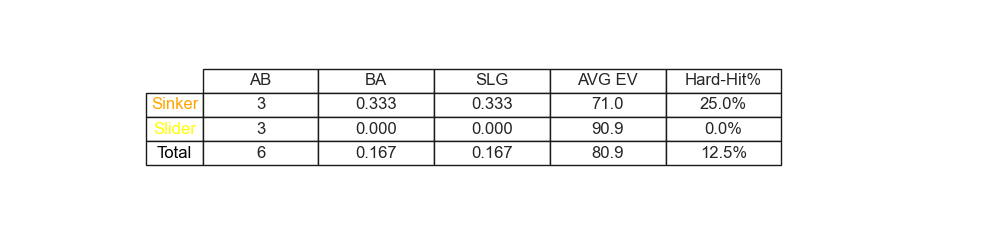

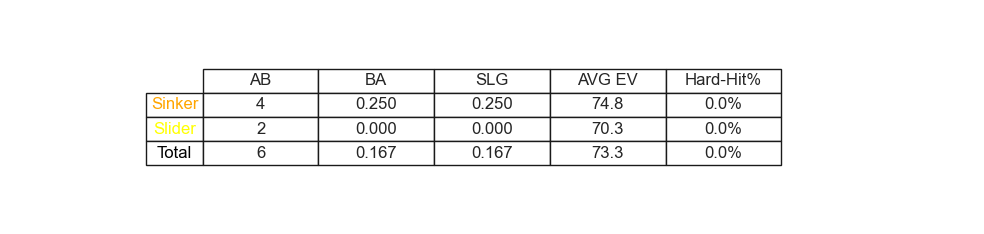

In [87]:
df_pitcher = df[
    (df["Pitcher"].str.strip() == player_name.strip()) &
    df["TaggedPitchType"].notna() &
    df["BatterSide"].isin(["Right", "Left"])
].copy()
df_pitcher["BatterSide"] = df_pitcher["BatterSide"].str.capitalize()

ab_df = df_pitcher[
    (df_pitcher["PlayResult"].isin(["Out", "Single", "Double", "Triple", "HomeRun", "Error"])) |
    (df_pitcher["KorBB"] == "Strikeout")
].copy()
ab_df["bases"] = ab_df["PlayResult"].map({
    "Single": 1,
    "Double": 2,
    "Triple": 3,
    "HomeRun": 4
}).fillna(0)

batted_df = df_pitcher[(df_pitcher["PlayResult"].notna()) & (df_pitcher["PitchCall"] == "InPlay")].copy()

grouped_ab = ab_df.groupby(["TaggedPitchType", "BatterSide"])
grouped_batted = batted_df.groupby(["TaggedPitchType", "BatterSide"])

def get_stats(ab_group, batted_group):
    ab = len(ab_group)
    hits = ab_group["PlayResult"].isin(["Single", "Double", "Triple", "HomeRun"]).sum()
    total_bases = ab_group["bases"].sum()
    ba = hits / ab if ab > 0 else 0
    slg = total_bases / ab if ab > 0 else 0

    if batted_group is not None and len(batted_group) > 0:
        avg_ev = batted_group["ExitSpeed"].mean()
        inplay_count = (batted_group["PitchCall"] == "InPlay").sum()
        hard_hit_count = ((batted_group["ExitSpeed"] >= 93.5) & (batted_group["PitchCall"] == "InPlay")).sum()
        hard_hit_pct = hard_hit_count / inplay_count if inplay_count > 0 else 0
    else:
        avg_ev = None
        hard_hit_pct = None

    return pd.Series({
        "AB": ab,
        "BA": ba,
        "SLG": slg,
        "AVG EV": avg_ev,
        "Hard-Hit%": hard_hit_pct
    })

results = []
for key, ab_group in grouped_ab:
    batted_group = grouped_batted.get_group(key) if key in grouped_batted.groups else None
    stats = get_stats(ab_group, batted_group)
    stats["TaggedPitchType"], stats["BatterSide"] = key
    results.append(stats)

stats_df = pd.DataFrame(results)

columns = ["AB", "BA", "SLG", "AVG EV", "Hard-Hit%"]
stats_rhh = stats_df[stats_df["BatterSide"] == "Right"].set_index("TaggedPitchType").sort_values("AB", ascending=False)
stats_lhh = stats_df[stats_df["BatterSide"] == "Left"].set_index("TaggedPitchType").sort_values("AB", ascending=False)

def add_total_row(df_subset):
    total_ab = df_subset["AB"].sum()
    total_hits = (df_subset["BA"] * df_subset["AB"]).sum()
    total_bases = (df_subset["SLG"] * df_subset["AB"]).sum()
    total_ev = (df_subset["AVG EV"] * df_subset["AB"]).sum()
    total_hard = (df_subset["Hard-Hit%"] * df_subset["AB"]).sum()

    row = pd.DataFrame({
        "AB": [total_ab],
        "BA": [total_hits / total_ab if total_ab > 0 else 0],
        "SLG": [total_bases / total_ab if total_ab > 0 else 0],
        "AVG EV": [total_ev / total_ab if total_ab > 0 else None],
        "Hard-Hit%": [total_hard / total_ab if total_ab > 0 else None]
    }, index=["Total"])
    return pd.concat([df_subset, row])

stats_rhh = add_total_row(stats_rhh)
stats_lhh = add_total_row(stats_lhh)

def generate_pitch_color_map(pitch_types):
    return dict(zip(pitch_types, palette))

all_pitches = stats_df["TaggedPitchType"].unique()
pitch_color_map = {pitch: fixed_pitch_colors.get(pitch, "black") for pitch in all_pitches}

def plot_stats_table(df, title):
    fig, ax = plt.subplots(figsize=(10, len(df)*0.5 + 1))
    ax.axis('off')
    ax.axis('tight')

    def fmt(x, col):
        if col == "AB":
            return f"{int(x)}"
        elif col == "AVG EV":
            return f"{x:.1f}" if pd.notnull(x) else "N/A"
        elif col == "Hard-Hit%":
            return f"{x*100:.1f}%" if pd.notnull(x) else "N/A"
        else:
            return f"{x:.3f}" if pd.notnull(x) else "N/A"

    table_data = df[columns].copy()
    for col in columns:
        table_data[col] = table_data[col].apply(lambda x: fmt(x, col))

    table = ax.table(
        cellText=table_data.values,
        rowLabels=table_data.index,
        colLabels=columns,
        cellLoc="center",
        rowLoc="center",
        loc="center"
    )

    for i, pitch in enumerate(table_data.index):
        color = pitch_color_map.get(pitch, (0, 0, 0))
        table._cells[(i + 1, -1)].get_text().set_color(color)

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(.6, 1.3)
    plt.title(title, fontsize=14, weight='bold', pad=-28)
    plt.tight_layout()
    plt.show()

plot_stats_table(stats_rhh, "")
plot_stats_table(stats_lhh, "")